# Básicos de Aprendizaje de Máquina(Machine Learning) con Regresión Lineal
## con elementos matemáticos básicos por Diego Aguado
Este proyecto es una iniciativa personal de demistificar el aprendizaje de máquina. Particularmente, estaré realizando este proyecto en español en un esfuerzo para contribuir al estudio de estos temas para gente que aprender en Inglés le representa un esfuerzo.

### Notación matemática
Para usar convenciones encontradas ampliamente en la literatura con contexto matemático, se usarán negritas para denotar vectores ($\textbf{x}$) y mayúsculas negritas para denotar matrices ($\textbf{X}$). Así, $\mathbf{X}$ denotará usualmente una matriz de observaciones y $\textbf{y}$ el vector de la variable respuesta asociada. Además, haremos referencia a parametros con letras griengas como $\beta, \gamma, \alpha, \Theta$, etc.

# Regresión lineal
## Un marco de referencia para aproximación de modelos de aprendizaje de máquina.
La regresión lineal univariada ($x$ es un solo número) es, probablemente, el modelo más simple para estimar una variable en función de otra.

Es decir, se busca predecir una variable, $y$, a través de una función lineal de $x$, es decir $ y \sim x\cdot \beta_1 +\beta_0$.

Esta última formula quiere decir que aproximamos a $y$ con la multiplicación de $x$ por $\beta_1$ y sumando $\beta_0$. En otras palabras, nuestra aproximación, usualmente llamada $\hat{y}$ está dada por la siguiente ecuación, $\hat{y} = x\cdot \beta_1 +\beta_0$. Esto es una recta en el plano $(x, y)$.

Usualmente, en la literatura tradicional se denomina a la  variable a predecir ($y$ en este caso) como variable _dependiente_ y la variable a usar como argumento de la función ($x$ en este caso) como variable _independiente_. 

Veamos a continuación un ejemplo sintético.

In [3]:
import numpy as np # librería de 'bajo nivel' para manejo de datos
import matplotlib.pyplot as plt # librería para 


## Ejemplo
Supongamos que la variable $x$ representa el peso de la gente en kilogramos y la variable $y$ su estatura en centímetros.

## Datos
Para simular un conjunto de datos, consideremos el siguiente codigo que hace uso de `numpy` y la distribución normal.

El conjunto de datos sintético consiste en observaciones $(x,y)$. Las observaciones de $x$ son obtenidas de una distribución normal con media 70 y desviación estandar 2. Si estos terminos de distribución, media y desviación estandar no te suenan y tienes curiosidad, te recomiendo leer este [wiki](https://en.wikipedia.org/wiki/Normal_distribution). Si no eres tan curioso, solo supon que son datos que podrías encontrar en algun fenomeno natural como el peso de la gente o el largo de los petalos de una flor, por ejemplo.

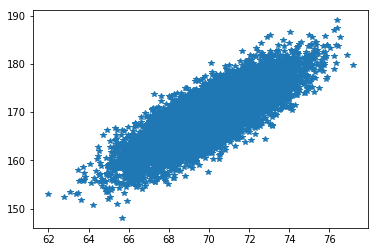

In [4]:
beta_1 = 2.1
beta_0 = 20
xx = np.random.normal(70,2, 10000)
error = np.random.normal(2,3, 10000)
yy = xx * beta_1 + beta_0 + error
plt.plot(xx, yy, '*')


En la visualización de arriba podemos observar una "clara" relación lineal entre las variables, con cierto ruido como es de esperarse.
Sin embargo, sigue dandose una relación entre ellas.

# Modelo para estos datos
Ahora, construyamos un modelo para estimar la estatura de alguien sabiendo su peso.

Supongamos que queremos obtener estaturas para pesos desde 50 hasta 80 kg. Nuestro modelo predictivo tendrá la siguiente formula,
$\hat{y} = x \cdot \beta_1 + \beta_0$.

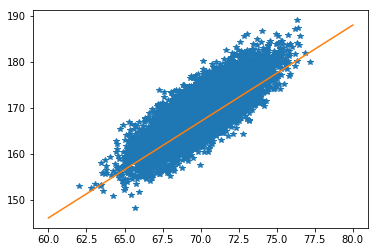

In [5]:
xid = np.linspace(60, 80, 100)
yid = xid * beta_1 + beta_0
plt.plot(xx, yy, '*')
plt.plot(xid, yid)


Dado este conjunto de datos, y el ruido inherente a ellos, **este es el mejor modelo que se puede construir**. Esto, por que de hecho es la forma en que se construyeron las observaciones sin contar el ruido.

### Pero, cómo estimar $\beta_1, \beta_0$ cuando no sabes la forma de los datos?

Supongamos que decidimos tomar una corazonada y establecer las siguientes estimaciones.

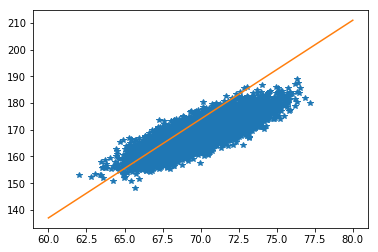

In [6]:
beta_1_est = 3.7
beta_0_est = -85
yid2 = (xid * beta_1_est) + beta_0_est
plt.plot(xx, yy, '*')
plt.plot(xid, yid2)


Haciendo uso de la visualización de arriba podemos *intuir* que este no es un muy buen modelo.
Pero para tener evidencia de ello, **necesitamos cuantificarlo**.

Una forma de cuantificar que tan mal está el modelo es medir el error de una observación a la predicción.
Es decir, $y - \hat{y}$ pero esto podría ser positivo o negativo dependiendo de las observaciones (los puntos por arriba o por abajo de la recta predictora).

Una mejor medida es el error cuadrático $(y - \hat{y})^2$, con esto aseguramos errores para cada observación siempre positivos.

Al sumarlos todos, tenemos una medida de error del modelo y el conjunto de datos: 

$C = \sum_i (y_i - \hat{y}_i)^2$.

El subindice $i$ hace notar que la suma itera sobre las observaciones del conjunto de datos.

Para este caso, tenemos que el *costo* del modelo está dado por esa suma $C$.

## Cómo bajar el costo?
Intuitivamente, sabemos que necesitamos bajar el costo al menor posible para tener el modelo que aproxime los datos de la mejor manera. La pregunta es cómo? Para resolver esta pregunta, usaremos el concepto de derivada.


## Derivadas para aprendizaje de máquina
Una derivada es el cambio del valor de una función cuando cambia uno de sus argumentos. Una razón de cambio, sencillo.

En nuestro caso, queremos saber como cambia $C$ cuando cambiamos $\beta_1$ y $\beta_0$, los cuales usamos para calcular nuestra predicción $\hat{y}$.

### Notación
La siguiente notación para denotar derivadas se lee como "parcial de C con respecto a beta cero" $\frac{\partial C}{\partial \beta_0}$ e indica la derivada de C con respecto a beta cero.

## Derivadas para encontrar mínimos.
El negativo de la derivada de una función, evaluada en cierto punto ($\frac{\partial f}{\partial x}$) es la dirección de máximo descenso para esta. Por lo que actualizando iterativamente el argumento de la función con el gradiente nos puede en teoría llevar a un mínimo. Es decir, en pseudo-código python:
```python
for iter in range(itermax):
    dCdbeta1 = calcular_gradiente(C, beta_1)
    beta_1 = beta_1 - alpha * dCdbeta1
    if debemos_parar:
        break
```
Ahora necesitamos una función `calcular_gradiente`. Para este ejemplo, tenemos suerte de saber la expresion de $\frac{\partial C}{\partial \beta_1}$.

$\frac{\partial C}{\partial \beta_1} = -2 \sum_i (y_i - \hat{y}_i) \cdot x_i$

$\frac{\partial C}{\partial \beta_0} = -2 \sum_i (y_i - \hat{y}_i)$.

A programarlo.

In [18]:
beta_1_est = 2.3 # una estimacion adivinando
beta_0_est = 10 # una estimacion adivinando
y_hat = (xx * beta_1_est) + beta_0_est
perdida_ind = (yy - y_hat)**2
C = np.sum(perdida_ind) / len(xx)
alpha = 0.0002 #tasa de aprendizaje
print("perdida inicial {}".format(C))

perdida inicial 13.279333569858974


## Ejercicio
Sigue las instrucciones en comentarios en la siguiente celda par terminar la función `entrenar_regresion_lineal`.

In [19]:
(yy - y_hat) * xx

# define itermax usando el valor de pérdida
itermax = 4500000
def entrenar_regresion_linear(beta_1_est, beta_0_est, itermax):
    y_hat = (xx * beta_1_est) + beta_0_est
    for i in range(4500000):
        diff = yy - y_hat
        dCdbeta_1 = np.average(diff * xx)
        dCdbeta_0 = np.average(diff)

        # En las siguientes define la actualización de los parametros
        beta_1_est = beta_1_est +  2 * alpha * 
        beta_0_est = beta_0_est + 2 * alpha *
        
        # En la siguiente linea define el valor de y_hat (pregunta, porqué hay que recalcular y_hat?)
        y_hat = 
        
        perdida_ind = (yy - y_hat)**2
        C = np.average(perdida_ind)
        if i %35000 == 0:
            print("iter {}, costo {}, beta_1 {}, beta_0 {}".format(i, C, beta_1_est, beta_0_est))
    return beta_1_est, beta_0_est

beta_1_est, beta_0_est = entrenar_regresion_linear(beta_1_est, beta_0_est, itermax)

# parametros originales
# beta_1 = 2.1
# beta_0 = 20

iter 0, costo 12.980097957097525, beta_1 2.2435419593817265, beta_0 9.999197142106185
iter 35000, costo 9.216410595479479, beta_1 2.269773844481353, beta_0 10.10168235489813
iter 70000, costo 9.21495496936035, beta_1 2.2683333070331777, beta_0 10.202614008882122
iter 105000, costo 9.213532188542183, beta_1 2.266909114732853, beta_0 10.302400435569954
iter 140000, costo 9.212141511891122, beta_1 2.2655010821191373, beta_0 10.401054629354434
iter 175000, costo 9.210782214996541, beta_1 2.2641090258351357, beta_0 10.498589437186805
iter 210000, costo 9.209453589793693, beta_1 2.262732764604439, beta_0 10.595017560249133
iter 245000, costo 9.208154944194861, beta_1 2.261372119207484, beta_0 10.69035155560954
iter 280000, costo 9.206885601728873, beta_1 2.2600269124582417, beta_0 10.784603837855673
iter 315000, costo 9.205644901188696, beta_1 2.2586969691811314, beta_0 10.877786680713145
iter 350000, costo 9.204432196287039, beta_1 2.2573821161882237, beta_0 10.969912218642282
iter 385000, 

iter 3185000, costo 9.160171742190004, beta_1 2.188275592487618, beta_0 15.811879879414352
iter 3220000, costo 9.159985110930027, beta_1 2.1877597800299506, beta_0 15.848020421657107
iter 3255000, costo 9.159802690888734, beta_1 2.187249820270452, beta_0 15.883750892986876
iter 3290000, costo 9.159624387042578, beta_1 2.1867456468011133, beta_0 15.919075946299175
iter 3325000, costo 9.159450106512173, beta_1 2.1862471939674375, beta_0 15.954000181694576
iter 3360000, costo 9.159279758513891, beta_1 2.1857543968598745, beta_0 15.988528147078625
iter 3395000, costo 9.159113254312583, beta_1 2.185267191305376, beta_0 16.02266433875362
iter 3430000, costo 9.15895050717535, beta_1 2.1847855138590355, beta_0 16.05641320200427
iter 3465000, costo 9.158791432326378, beta_1 2.184309301795828, beta_0 16.08977913167694
iter 3500000, costo 9.158635946902754, beta_1 2.1838384931024453, beta_0 16.122766472751188
iter 3535000, costo 9.158483969911318, beta_1 2.1833730264692166, beta_0 16.155379520906

A la metodologīa anterior podemos plasmarlo como un marco de referencia para entrenar algunos modelos de aprendizaje de máquina.

## Marco de referencia para entrenar modelos
Se necesita
0. Conjunto de datos {(x, y) tal que y ~ f(x)}
1. funcion predictiva (e.g. x* weight + bias)
2. funcion de perdida denotada por l (e.g. (y - y_hat)^2)
3. funcion de costo Sum_{i} l(y, y_hat)

El método anterior se conoce como [Descenso de Gradiente Estocástico](https://en.wikipedia.org/wiki/Gradient_descent) (SGD) (Dado que el conjunto de datos no es tan grande, se tomó la muestra total para calcular el gradiente sin necesidad de una componente aletoria)

Recordando que el objetivo es minimizar la funcion de costo "moviendo" los parametros (e.g. `beta_0, beta_1`)
### Se usa SGD para llevar a cabo la minimización

### SGD: Algoritmo, numérico iterativo, para minimizar funciones calculando
### el gradiente (derivada) de la funcion (objetivo) a minimizar
Se necesita
1. funcion objetivo continua y diferenciable, C(parametros | datos, modelo)
2. gradiente, vector de derivadas de C con respecto a los parametros: [dC/dweight, dC/dbias]

### Pseudocodigo SGD
0. inicializar los parametros aleatoriamente. (eg. weights = -0.4, bias = 0.3)
1. inicializar paso (e.g. paso = 0.0001)
2.  for iter in range(itermax)
     calcular gradiente (dC/dparametros)
     actualizar parametros: parametros = parametros - paso * gradiente
